<a href="https://colab.research.google.com/github/matteoalberti/Lectures_introUML_Experis2020/blob/main/Dimensionality_Reduction/Day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Autoencoder

   Email: m.alberti@deeplearningitalia.com

   Linkedin:
   [linkedin_matteo_alberti](www.linkedin.com/in/matteo-alberti-695570110)

# Summary

- <font color=BE3315>**Brief Recap** </font> 
- <font color=C24024>**AutoEncoder [AE] Overview** </font> 
- <font color=CA4A2F>**Information Theory Notes** </font>

- <font color=E15234>**[AE] AutoEncoder Variants** </font> 

- <font color=E35F2A>**Exercises** </font>

# Brief Recap

### Principal Component Analysis


**Step-by-Step**

In [67]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [54]:
X = np.random.randint(4,size=(4,4));X

array([[2, 2, 1, 2],
       [1, 3, 0, 3],
       [3, 1, 1, 0],
       [3, 2, 3, 1]])

In [57]:
#Standardize
X_scal = StandardScaler().fit_transform(X); X_scal

array([[-0.30151134,  0.        , -0.22941573,  0.4472136 ],
       [-1.50755672,  1.41421356, -1.14707867,  1.34164079],
       [ 0.90453403, -1.41421356, -0.22941573, -1.34164079],
       [ 0.90453403,  0.        ,  1.60591014, -0.4472136 ]])

*Covariance measures how two features vary with each other*

 For two feature vectors $x_{j}$  and $x_{k}$ the covariance between them $\sigma_{jk}$ can be calculated using the following equation:

<img src="https://www.oreilly.com/library/view/r-statistics-cookbook/9781789802566/assets/76a7f6ab-d154-4882-87cd-bfc020566108.png" width="300">


<img src="https://freedomtowin.github.io/non_gauss_images/output_0.png" width="300">


While our features were standardize :

$$ \sum = \frac{1}{n-1} X^T X $$


In [78]:
#Computing the covariance matrix

cov = np.cov(X_scal); cov

array([[ 0.11392956,  0.43994057, -0.2878807 , -0.26598942],
       [ 0.43994057,  2.46198514, -1.615942  , -1.28598371],
       [-0.2878807 , -1.615942  ,  1.19614926,  0.70767344],
       [-0.26598942, -1.28598371,  0.70767344,  0.84429969]])

In [59]:
cov.shape

(4, 4)

### Eigendecomposition

- The **eigenvectors** represent the principal components (**the directions of maximum variance**) of the covariance matrix

- The **eigenvalues** are their corresponding **magnitude**


*Eingenvectors and Eingenvalues are related :*

$$Σv=λv$$



In [79]:
# Eigendecomposition

eigvals, eigvects = np.linalg.eig(cov)

In [61]:
print(eigvals.shape, eigvects.shape)

(4,) (4, 4)


In [80]:
eigvals

array([ 4.28435889e+00,  2.94681396e-01,  3.73233718e-02, -5.81049032e-17])

In [81]:
eigvects

array([[ 0.13967687,  0.10937857, -0.84765954,  0.5       ],
       [ 0.75703446,  0.00671428,  0.42053983,  0.5       ],
       [-0.50004513,  0.64240075,  0.29542537,  0.5       ],
       [-0.3966662 , -0.75849359,  0.13169434,  0.5       ]])

### Select the number of components

Sort EingenVects based on Magnitude of our EigenVals

In [82]:
idx = np.argsort(eigvals, axis=0)[::-1]
sorted_eig_vectors = eigvects[:, idx]

**How can we choose the number of components?**

*plotting the cumulative sum of the eigenvalues*

$$ \frac{λ_j}{\sum_{j=1}^d λ_j} $$



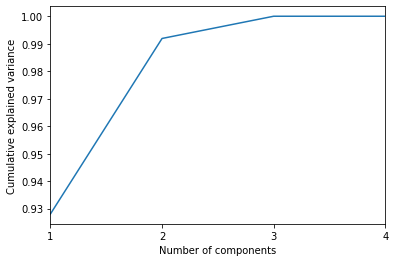

In [83]:
cumsum = np.cumsum(eigvals[idx]) / np.sum(eigvals[idx])
xint = range(1, len(cumsum) + 1)
plt.plot(xint, cumsum)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.xticks(xint)
plt.xlim(1, 4, 1)
plt.show()

### Transform data into the subspace

$$Z=XW$$





In [84]:
Z = np.dot(X_scal, sorted_eig_vectors[:, :2]); Z

array([[-0.10479046, -0.51956436],
       [ 0.90144513, -1.9099091 ],
       [-0.29736414,  0.95969031],
       [-0.49929054,  1.46978315]])

## Autoencoder Overview

*Autoencoders are a specific type of feedforward neural networks where the input is the same as the output.*

![](https://miro.medium.com/max/700/1*MMRDQ4g3QvQNc7iJsKM9pg@2x.png)

More technically, autoencoders are unsupervised neural networks that aim to copy their inputs to their outputs. They work by compressing the input into a **latent-space representation**, and then reconstructing the output from this representation. 


![](https://hackernoon.com/hn-images/1*8ixTe1VHLsmKB3AquWdxpQ.png)

- The **latent vector** is the essence of the autoencoder;

- The encoder and the decoder could be composed by any kind of layers. We will se a CNN-autoencoder;



**What we need?**

- An encoding method
- A Decoding method
- Loss function *to compare the output with the target*


## Introduce the main layers



**Encoder:** This is the part of the network that compresses the input into a latent-space representation. It can be represented by an encoding function 

### $$h=f(x).$$

**Decoder**: This part aims to reconstruct the input from the latent space representation. It can be represented by a decoding function 

### $$r=g(h).$$


The autoencoder as a whole can thus be described by the function 

### $$g(f(x)) = r.$$ 

where $r$ is called **reconstruction**. By training the autoencoder to copy the input to the output ($r$ as close as the original input $x$), the latent representation $h$ will take on useful properties. For instance, if the dimension of $h$ is smaller than $x$ we can construct a representation of the input which is compressed. This forces the autoencoder to learn the most salient features of the training data (a sort of PCA).

References:
- [Gradient-based learning applied to document recognition](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf). Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. Proceedings of the IEEE, 86(11):2278-2324, November 1998.


## Let's code together a simple autoencoder!


In [88]:
import tensorflow as tf

In [89]:
input_size = 784
hidden_size = 128
code_size = 32

#Encoder
input_img = tf.keras.Input(shape=(input_size,))
hidden_1 = tf.keras.layers.Dense(hidden_size, activation='relu')(input_img)

#Encoding Dim
code = tf.keras.layers.Dense(code_size, activation='relu')(hidden_1)

#Decoder
hidden_2 = tf.keras.layers.Dense(hidden_size, activation='relu')(code)
output_img = tf.keras.layers.Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = tf.keras.Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_3 (Dense)              (None, 784)               101136    
Total params: 209,968
Trainable params: 209,968
Non-trainable params: 0
_________________________________________________________________


## <h1><center>  Information Theory Background 


### Self-Information

The idea behind self-information is the following

* **if an event always occurs, we associate it with a smaller amount of information. It will not suprise us!**
* **On the other side, a rare event is associated with a huge amount of information. It will suprise us!**

I am not surprise to see the sunrise every morning (likely event). Instead,  I would be really suprised if tomorriw the Sun will not rise (unlikely event). This amount of surprise or self-information of the event $x$ is quantified by

$$I(x) = - \log p(x),$$

where $p(x)$ is the probability of the event $x$. If $p(x)=1$, then self-info is zero. A rare event instead has a huge surpise factor.

### Shannon Entropy 

In terms of self-info, **Shannon Entropy** is the is the average self-information (**expected value**) over all possible values of X.
The entropy for a probability $p(x)$ distribution is

$$ S = - \sum_i p(x_i) \log p(x_i),$$

where we assume we know the probability $p$ for each outcome $i$. If we use $log_2$  for our calculation we can **interpret entropy as *the minimum number of bits it would take us to encode our information*.**

For continous variables, we can use the integral form

$$ S = - \int  p(x) \log p(x) \, dx,$$

where now $p(x)$ is take the role of a **probability density function** (PDF). Take in mind that a broad probability density has higher entropy than an narrowed one (think about Gaussian distribution vs delta Dirac, which has $S=0$).

In both discrete and continous formulation, we are computing the expectation (i.e. average) of the negative log-probability (i.e. self-info) which is the theoretical minimum encoding size of the information from the event $x$. The same formula is usually written as

$$S = \mathbb E _{\, x \sim p} \left[ -\log p(x) \right],$$

where $x \sim p$ means that we calculate the expectation with the probability distribution $p$.

Let's say we have to pass a message about what drink Matteo would take during the week. In general, Matteo loves *Puer Tea* , Green Tea, black Tea and Oolong Tea.

![Puer Tea](https://c.ndtvimg.com/sc8uey7at2h_puerh-tea_625x300.jpg) 

-----------------------
*Small Recap :*

- Black Tea : Twinings (like) - you can eat some biscuits
- Green Tea and Oolong : really good if you wanna relax (evening)
- Puer : only in special occasions (take your time)

-----------------------
$$$$


Usually Matteo has not preferences about the tea type (*not real*) the probability distribution of his choice is: 

$$P(\text Puer Tea ) =  P(\text Green Tea ) = P(\text black Tea ) = P(\text Oolong Tea ) = 0.25,$$

while the corresponding entropy

$$S = - \frac{1}{4} \log \frac{1}{4} - \frac{1}{4} \log \frac{1}{4} - \frac{1}{4} \log \frac{1}{4} - \frac{1}{4} \log \frac{1}{4} = 2$$

In the morning, he usually is late and wanna have breakfast : 

$$P(\text Puer Tea ) = 0.125,\;  P(\text Green Tea ) =0.125,\;  P(\text black Tea ) = 0.5,\; P(\text  Oolong Tea ) = 0.25,$$

while the corresponding entropy

$$S = - \frac{1}{8} \log \frac{1}{8} - \frac{1}{8} \log \frac{1}{8} - \frac{1}{2} \log \frac{1}{2} - \frac{1}{4} \log \frac{1}{4} = 1.75$$


On Sunday late afternoon, Matteo often looks for some relax on his sofa

$$P(\text Puer Tea ) = 0.012,\;  P(\text Green Tea ) =0.52,\;  P(\text black Tea ) = 0.018,\; P(\text  Oolong Tea ) = 0.45,$$

and the corresponding entropy

$$S = - 0.012 \log 0.012 - 0.52 \log 0.52 - 0.018 \log 0.018 - 0.45 \log 0.45 = 1.365$$

**If entropy is high (encoding size $log_2 p(x)$ is big on average)**, **it means we have many message types with small and almost equal probabilities**. Hence, every time a new message arrives, you would expect a different type than previous messages. You may see it as a disorder or uncertainty or unpredictability.

On the contrary, **when a message has much smaller probability than other message, it appears as a surprise because on average you would expect other more frequently sent message types**. Also, a rare message type has more information than more frequent message types because it eliminates a lot of other probabilities and tells us more specific information.

If the entropy is high, the average encoding size is significant which means each message tends to have more (specific) information. Again, this is why high entropy is associated with disorder, uncertainty, surprise, unpredictability, amount of information. The more random a message is, the more information will be gained from decoding the message.

**Low entropy means that most of the times we are receiving the more predictable information which means less disorder**, less uncertainty, less surprise, more predictability and less (specific) information. 

### Cross Entropy

**Suppose to have two distributions**, the true one $p(x)$ and the estimated $q(x)$. In the language of neural networks, $p(x)$ would be the grond truth (labels in one hot-encoding) and $q(x)$ the outcome of the net, i.e. the one that your machine learning algorithm is trying to match. **Cross entropy is a mathematical tool for comparing two probability distributions** $p(x)$ and $q(x)$ and it is expressed by the formula 

$$ H (p,q) = - \int p(x) \log q(x)\,dx.$$

If $\log$ is in base $2$, then cross entropy measures the **number of bits you will need encoding symbols** from $p$ using the wrong distribution $q$. Subtracting to cross entropy the entropy of $p$, you are counting the cost in terms of bits of using the wrong distribution $q$ (this somehow will be KL-divergence). 

In [ ]:
# Import scipy and numpy module
import scipy.stats
import numpy as np

# Create an array
a=np.array([1,1,2,3,1,3,4,2,5,6,3,2,4,3])


# Compute probability distribution
a_pdf=scipy.stats.norm.pdf(a)

# Calculate the entropy of a distribution for given probability values.
entropy = scipy.stats.entropy(a_pdf) # get entropy from probability values
print("Entropy: ",entropy)

Entropy:  1.6688066853941022


### Kullback-Leibler Divergence

Kullback–Leibler divergence is the relative entropy of two probability distributions. It measures the distance(similarity or dissimilarity) of one distribution from another reference probability distribution. 0 Value of Kullback–Leibler divergence indicates that both distributions are identical. It can be expressed as : 

$$D_{KL}(h || g) = - \sum_i h(x_i) (\log h(x) - \log g(x)) = - \sum_i h(x_i) \log \frac{h(x)}{g(x)}$$ 

- **not a measure : it's asymmetric**


In the variational autoencoder loss function, the KL-divergence is used to force the distribution of latent variables  q(z|x)  to be a normal distribution  n(z)  so that we can sample latent variables from the normal distribution. As such, the KL-divergence is included in the loss function to improve the similarity between the distribution of latent variables and the normal distribution

In [ ]:
# Import scipy.stats and numpy module
import scipy.stats
import numpy as np

# Create numpy arrays
a=np.array([1,1,2,3,1,3,4,2,5,6,3,2,4,3])
b=np.array([1,1,3,4,2,4,5,2,5,6,3,2,4,3])

# Compute probability distribution
a_pdf=scipy.stats.norm.pdf(a)
b_pdf=scipy.stats.norm.pdf(b)

# compute relative entropy or KL Divergence
kl_div=scipy.stats.entropy(a_pdf,b_pdf)

print("KL Divergence: ",kl_div)

KL Divergence:  0.26732496641464365


## AutoEncoders vs PCA

*Training an autoencoder with one dense encoder layer and one dense decoder layer and linear activation is essentially equivalent to performing PCA*

- An autoencoder could let you make use of pre trained layers from another model, to apply transfer learning to prime the encoder/decoder.

![](https://miro.medium.com/max/700/1*P7-YLUAwXH6OI8fxh17gpA.png)

## AutoEncoder variants

### Sparse AutoEncoder

*We can regularize the autoencoder by using a sparsity constraint such that only a fraction of the nodes would have nonzero values, called active nodes.*


![](https://miro.medium.com/max/399/1*kj2xw4MJLNOKZ_-qLTbDPQ.png)

$$$$

-------------------------------
**L2 & L1 regularization**

*These update the general cost function by adding another term known as the regularization term.*

*Due to the addition of this regularization term, the values of weight matrices decrease because it assumes that a neural network with smaller weight matrices leads to simpler models.*

**Therefore, it will also reduce overfitting to quite an extent.**

*An Example :*

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/04/Screen-Shot-2018-04-04-at-1.59.54-AM.png)

---------------------------------------------


*Similar to Dropout*

In [92]:
#Encoder
input_img = tf.keras.Input(shape=(input_size,))
hidden_1 = tf.keras.layers.Dense(hidden_size, activation='relu', activity_regularizer=tf.keras.regularizers.L1(10e-6))(input_img)

#Encoding Dim
code = tf.keras.layers.Dense(code_size, activation='relu', activity_regularizer=tf.keras.regularizers.L1(10e-6))(hidden_1)

#Decoder
hidden_2 = tf.keras.layers.Dense(hidden_size, activation='relu', activity_regularizer=tf.keras.regularizers.L1(10e-6))(code)
output_img = tf.keras.layers.Dense(input_size, activation='sigmoid', activity_regularizer=tf.keras.regularizers.L1(10e-6))(hidden_2)

sparse_autoencoder = tf.keras.Model(input_img, output_img)
sparse_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

sparse_autoencoder.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_7 (Dense)              (None, 784)               101136    
Total params: 209,968
Trainable params: 209,968
Non-trainable params: 0
_________________________________________________________________


### Stacked Autoencoders

$$$$

-------------------------------------------

<img src="https://miro.medium.com/max/700/1*7H9VQlN94-wv7Ianqt6GZg.png" width=500\>


*Nothing to say. Just a deeper version : ANN --> MLP*

### Variational AutoEncoders


$$$$

-------------------------------------------

![](https://www.analyticsindiamag.com/wp-content/uploads/2019/08/vae-768x474.png)

-------------------------------------------

$$$$

**Basic Idea**

*Instead of mapping an input to fixed vector, input is mapped to a distribution*

**bottleneck vector** is replaced with two different vectors one representing the **mean** of the distribution and the other representing the **standard deviation** of the distribution.

*We have to define a new Loss Function :*

$$ l​oss​​(θ,ϕ)=−E​z∼q​θ​​(z∣x​i​​)​​[logp​ϕ​​(x​i​​∣z)]+KL(q​θ​​(z∣x​i​​)∣∣p(z)) $$

*Where :*

- $ q​θ​​(z∣x​i​​) : $ Reconstruction Loss
- $ [logp​ϕ​​(x​i​​∣z)] :$ Regularizer
- $ KL(q​θ​​(z∣x​i​​)∣∣p(z) : $ KL divergence (encoder distribution vs $p(z)$
  - divergence measures how much information is lost when using q to represent p

# Domain Application

##  [Computer Vision - Image Recontruction]

      Choose and Load a dataset (mnist, cifar10, cifar100, fashion_mnist)

In [94]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### Apply Simple Autoencoder and reconstruct the pictures

### Apply Convolutional Autoencoder and reconstruct the pictures

##  [Tabular Data - Feature Extractor]

      Open your previous exercise Notebook (Day2_exercise.ipynb) and test a basic autoencoder in the following way :

      - Reduce your data with PCA
      - Reduce your data with AE

      Apply Custering / Classification/ Regression from this two projected version and evaluate performances depending on your dataset type


      **** Tips : I need some help!   


In [ ]:
# load your data X and make preprocessing (like scaling)

# apply PCA / AE like :

pca = PCA(0.9).fit(X)
X_projected = pca.transform(X)

# Now "X_projected" is my new set of features! Check multicollinerity

# for clustering
kmeans = KMeans(n_clusters=10,init='k-means++',max_iter=300, n_init=12, random_state=0).fit(X_projected) # just an example

# for classification, Please develop a Neural Network with Dense!
log_regressor=LogisticRegression(multi_class='multinomial') 
log_regressor.fit(X_projected, Y_train)

# for regression, Please develop a Neural Network with Dense!
lin_regressor=LinearRegression()
lin_regressor.fit(X_projected, Y_train)